In [4]:
import itertools
import pickle
import math

import lightgbm
import numpy as np
import pandas as pd
# import shap
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
import sklearn.ensemble
import sklearn.datasets

In [39]:
data = sklearn.datasets.load_iris(as_frame=True)

df = data["frame"].sample(100, random_state=123).reset_index(drop=True)

X, y = df.drop(columns="target"), df["target"]

model = lightgbm.LGBMClassifier(
#     learning_rate=0.3,
#     boost_from_average=False,
    n_estimators=10,
    max_depth=2,
    objective='binary',
#     num_leaves=50
#     min_child_weight=13,
).fit(X, y)


In [40]:
X.shape

(100, 4)

In [41]:
model.predict(X[:1], raw_score=True)

array([[-1.85231387, -0.40453671, -0.26078178]])

In [42]:
pd.DataFrame(model.predict(X[:10], pred_contrib=True))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,-0.769276,0.0,-1.083038,0.0,0.0,0.544246,0.483377,-1.43216,-5.551115e-17,0.0,1.056486,-0.090673,-1.226595
1,0.0,0.0,-0.769276,0.0,-1.083038,0.0,0.0,-0.478736,-0.119045,-1.43216,-5.551115e-17,0.0,1.029162,0.192679,-1.226595
2,0.0,0.0,-0.769276,0.0,-1.083038,0.0,0.0,-0.478736,-0.119045,-1.43216,-5.551115e-17,0.0,1.029162,0.192679,-1.226595
3,0.0,0.0,-0.781652,0.0,-1.083038,0.0,0.0,0.823626,0.483377,-1.43216,0.000000e+00,0.0,-0.615770,-0.102107,-1.226595
4,0.0,0.0,1.210843,0.0,-1.083038,0.0,0.0,-0.270968,-0.392632,-1.43216,5.551115e-17,0.0,-0.602638,-0.102107,-1.226595
5,0.0,0.0,-0.769276,0.0,-1.083038,0.0,0.0,0.488215,0.014364,-1.43216,-5.551115e-17,0.0,1.029162,0.192679,-1.226595
6,0.0,0.0,-0.781652,0.0,-1.083038,0.0,0.0,0.823626,0.483377,-1.43216,0.000000e+00,0.0,-0.555741,-0.090673,-1.226595
7,0.0,0.0,1.210843,0.0,-1.083038,0.0,0.0,-0.270968,-0.392632,-1.43216,5.551115e-17,0.0,-0.602638,-0.102107,-1.226595
8,0.0,0.0,1.210843,0.0,-1.083038,0.0,0.0,-0.270968,-0.392632,-1.43216,5.551115e-17,0.0,-0.602638,-0.102107,-1.226595
9,0.0,0.0,-0.781652,0.0,-1.083038,0.0,0.0,0.823626,0.483377,-1.43216,5.551115e-17,0.0,-0.555741,-0.090673,-1.226595


In [17]:
model.predict(X[:1], pred_contrib=True).shape

(1, 15)

In [12]:
model.predict(X[:1])

array([2])

In [6]:
model.predict(X, raw_score=True).mean(axis=0)

array([-1.08303761, -1.43215978, -1.22659518])

In [9]:
import lightgbm
import shap

data = sklearn.datasets.load_iris(as_frame=True)

df = data["frame"].sample(100).reset_index(drop=True)

X, y = df.drop(columns='target'), df['target']

model = lightgbm.LGBMClassifier(n_estimators=2, max_depth=2).fit(X, y)

explainer = shap.Explainer(model)

shap_values = explainer.shap_values(X)

print(df.target.value_counts(normalize=True).sort_index().values)
print(np.exp(explainer.expected_value))
print(explainer.expected_value)

going through node_sample_weight branchg
[0.35 0.28 0.37]
[0.34751692 0.27843734 0.36839887]
[-1.0569419203898336, -1.278562253579809, -0.9985890291505316]


In [13]:
model.predict(X, raw_score=True).mean(axis=0)

array([-1.05694192, -1.27856225, -0.99858903])

In [14]:
mean_logit = model.predict(X, raw_score=True).mean(axis=0)

In [17]:
np.testing.assert_allclose(mean_logit, explainer.expected_value)

In [3]:
import lightgbm
import shap

data = sklearn.datasets.load_iris(as_frame=True)

df = data["frame"].sample(100, random_state=123).reset_index(drop=True)

X, y = df.drop(columns="target"), df["target"]

model = lightgbm.LGBMClassifier(
#     learning_rate=0.3,
#     boost_from_average=False,
    n_estimators=1,
    max_depth=1,
#     num_leaves=50
#     min_child_weight=13,
).fit(X, y)

# explainer = shap.TreeExplainer(model, data=X)
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X)

print(df.target.value_counts(normalize=True).sort_index().values)
print(explainer.expected_value)

going through node_sample_weight branchg
[0.38 0.28 0.34]
[0.38 0.28 0.34]
[-0.967584024912421, -1.2729656734476236, -1.0788096594240657]


In [6]:
model.predict(X, raw_score=True).mean(axis=0)

array([-0.96758402, -1.27296567, -1.07880966])

In [9]:
import lightgbm
import shap

data = sklearn.datasets.load_iris(as_frame=True)

df = data["frame"].sample(100).reset_index(drop=True)

X, y = df.drop(columns='target'), df['target']

model = lightgbm.LGBMClassifier(n_estimators=2, max_depth=2).fit(X, y)

explainer = shap.Explainer(model)

shap_values = explainer.shap_values(X)

print(df.target.value_counts(normalize=True).sort_index().values)
print(np.exp(explainer.expected_value))
print(explainer.expected_value)

going through node_sample_weight branchg
[0.35 0.28 0.37]
[0.34751692 0.27843734 0.36839887]
[-1.0569419203898336, -1.278562253579809, -0.9985890291505316]


In [13]:
model.predict(X, raw_score=True).mean(axis=0)

array([-1.05694192, -1.27856225, -0.99858903])

In [14]:
mean_logit = model.predict(X, raw_score=True).mean(axis=0)

In [17]:
np.testing.assert_allclose(mean_logit, explainer.expected_value)

In [30]:
model.booster_.dump_model().keys()

dict_keys(['name', 'version', 'num_class', 'num_tree_per_iteration', 'label_index', 'max_feature_idx', 'objective', 'average_output', 'feature_names', 'monotone_constraints', 'feature_infos', 'tree_info', 'feature_importances', 'pandas_categorical'])

In [39]:
for k in sorted(model.booster_.dump_model().keys()):
    if k != 'tree_info':
        print(f'{k}: {model.booster_.dump_model()[k]}')

average_output: False
feature_importances: {'petal_length_(cm)': 3}
feature_infos: {'sepal_length_(cm)': {'min_value': 4.3, 'max_value': 7.9, 'values': []}, 'sepal_width_(cm)': {'min_value': 2, 'max_value': 4.4, 'values': []}, 'petal_length_(cm)': {'min_value': 1, 'max_value': 6.9, 'values': []}, 'petal_width_(cm)': {'min_value': 0.1, 'max_value': 2.5, 'values': []}}
feature_names: ['sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)', 'petal_width_(cm)']
label_index: 0
max_feature_idx: 3
monotone_constraints: []
name: tree
num_class: 3
num_tree_per_iteration: 3
objective: multiclass num_class:3
pandas_categorical: []
version: v3


In [11]:
print(json.dumps(model.booster_.dump_model()['tree_info'][0], indent=4))

{
    "tree_index": 0,
    "num_leaves": 2,
    "num_cat": 0,
    "shrinkage": 1,
    "tree_structure": {
        "split_index": 0,
        "split_feature": 2,
        "split_gain": 63.90959930419922,
        "threshold": 3.4000000000000004,
        "decision_type": "<=",
        "default_left": true,
        "missing_type": "None",
        "internal_value": -0.967584,
        "internal_weight": 0,
        "internal_count": 100,
        "left_child": {
            "leaf_index": 0,
            "leaf_value": -0.7994009496911725,
            "leaf_weight": 13.782599687576292,
            "leaf_count": 39
        },
        "right_child": {
            "leaf_index": 1,
            "leaf_value": -1.0751109090702684,
            "leaf_weight": 21.55739951133728,
            "leaf_count": 61
        }
    }
}


In [14]:
model.predict_proba(X[:2])

array([[0.32812311, 0.28361493, 0.38826197],
       [0.32812311, 0.28361493, 0.38826197]])

In [20]:
model.predict(X[:2], raw_score=True)

array([[-1.07511091, -1.22088234, -0.90681949],
       [-1.07511091, -1.22088234, -0.90681949]])

In [18]:
t = model.predict(X[:2], raw_score=True)

In [24]:
np.exp(t) / (1 + np.exp(t))

array([[0.25443235, 0.22778121, 0.28765111],
       [0.25443235, 0.22778121, 0.28765111]])

In [28]:
odds = np.exp(model.predict(X[:2], raw_score=True))

In [29]:
odds / (1 + odds)

array([[0.25443235, 0.22778121, 0.28765111],
       [0.25443235, 0.22778121, 0.28765111]])

In [4]:
features = X.columns

X_left = X[X[features[2]] <= 3.4]

X_right = X[X[features[2]] > 3.4]

y_right = y.loc[X_right.index]
y_right.value_counts()

y_left = y.loc[X_left.index]
y_left.value_counts()

0    38
1     1
Name: target, dtype: int64

In [21]:
t = -1.0751109090702684

In [22]:
y_hat = np.exp(t) / (1 + np.exp(t))

In [39]:
grad_left = y_hat - (1 - y_left)

In [40]:
# grad_left

In [41]:
hessian_left = y_hat * ( 1- y_hat)

In [42]:
w = - np.sum(grad_left) / np.sum([hessian_left] * len(y_left))

In [43]:
w

3.7951492201710373

In [3]:
# explainer.model.values[:,0]

In [4]:
np.exp(explainer.model.values[:,0][:3].sum(axis=0))

array([0.38, 0.28, 0.34])

In [5]:
# get log-prob of each class in the root of the first tree.
np.exp(explainer.model.values[:3][:,0].sum(axis=0))

array([0.38, 0.28, 0.34])

In [6]:
# explainer.model.values[:,0]

In [7]:
y.value_counts()

0    38
2    34
1    28
Name: target, dtype: int64

In [70]:
(X[features[2]] <= 3.4).value_counts()

False    61
True     39
Name: petal length (cm), dtype: int64

In [75]:
np.exp(-0.7994009496911725) / (np.exp(-0.7994009496911725) + 1)

0.31015367612315925

In [8]:
# [_['shrinkage'] for _ in model.booster_.dump_model()['tree_info']]

In [14]:
explainer.model.values

array([[[-0.96758402,  0.        ,  0.        ],
        [-0.79940095,  0.        ,  0.        ],
        [-1.07511091,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 0.        , -1.27296567,  0.        ],
        [ 0.        , -1.22088234,  0.        ],
        [ 0.        , -1.36555827,  0.        ],
        [ 0.        , -1.05936582,  0.        ],
        [ 0.        , -1.33874574,  0.        ]],

       [[ 0.        ,  0.        , -1.07880966],
        [ 0.        ,  0.        , -1.17981976],
        [ 0.        ,  0.        , -1.17981976],
        [ 0.        ,  0.        , -0.90681949],
        [ 0.        ,  0.        , -1.17981976]]])

In [9]:
explainer.expected_value

[-0.967584024912421, -1.2729656734476236, -1.0788096594240655]

In [12]:
np.log(0.38)

-0.9675840262617056

In [10]:
13.782599687576292 * 39 + (-1.0751109090702684) * 61

471.93962236218897

In [8]:
odds = np.exp(explainer.expected_value)

In [9]:
odds / (1 + odds)

array([0.25293161, 0.19276239, 0.2267779 ])

In [61]:
np.mean((model.predict(X) == y).mean())

1.0

In [62]:
explainer.expected_value

[-2.5306736275219532, -1.6119239114247061, -2.7971302038342967]

In [63]:
explainer.model.values[:,0].sum(0)

array([-2.53067363, -1.61192391, -2.7971302 ])

In [64]:
explainer.model.values[:,0].sum(axis=0)

array([-2.53067363, -1.61192391, -2.7971302 ])

In [65]:
explainer.model.values[:,0].sum(axis=0)

array([-2.53067363, -1.61192391, -2.7971302 ])

In [45]:
probs = model.predict_proba(X[y==0])

In [48]:
np.log(probs / (1 - probs)).mean()

-4.315284518658209

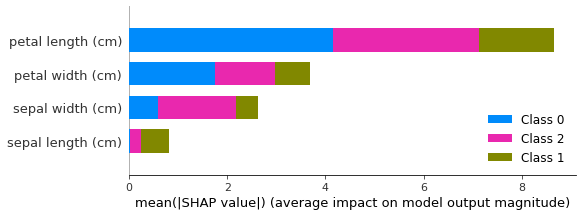

In [66]:
shap.summary_plot(shap_values, X)

In [67]:
shap.initjs() # you need this so the plots can be displayed

In [68]:
X.iloc[0,:]

sepal length (cm)    6.3
sepal width (cm)     2.5
petal length (cm)    4.9
petal width (cm)     1.5
Name: 0, dtype: float64

In [73]:
shap_values[0][0]

array([ 8.71973757e-04, -4.93002615e-01, -3.72745786e+00, -1.24356051e+00])

In [77]:
shap_values[0][0]

array([ 8.71973757e-04, -4.93002615e-01, -3.72745786e+00, -1.24356051e+00])

In [80]:
X.iloc[0]

sepal length (cm)    6.3
sepal width (cm)     2.5
petal length (cm)    4.9
petal width (cm)     1.5
Name: 0, dtype: float64

In [85]:
model.predict_proba(X.iloc[[0]])

array([[2.22044762e-05, 9.91004980e-01, 8.97281577e-03]])

In [93]:
model.predict_proba(X.iloc[[4]])

array([[9.99904994e-01, 9.41549877e-05, 8.50805775e-07]])

In [95]:
np.exp(5.89) / (np.exp(5.89) + 1)

0.997240658337165

In [104]:
sum(shap_values[0][4])

8.418443799735398

In [102]:
shap.force_plot(0, shap_values[0][4], X.iloc[4])

In [94]:
shap.force_plot(explainer.expected_value[0], shap_values[0][4], X.iloc[4])

In [101]:
5.89 - explainer.expected_value[0]

8.420673627521953

In [30]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

AttributeError: 'numpy.ndarray' object has no attribute 'base_values'

In [12]:
np.exp(explainer.expected_value)

array([0.07960538, 0.19950342, 0.06098483])

In [13]:
exponentials = np.exp(explainer.expected_value) 

In [14]:
exponentials / (1 + exponentials)

array([0.07373563, 0.16632168, 0.05747945])

In [11]:
y.value_counts()

0    38
2    34
1    28
Name: target, dtype: int64

In [13]:
np.log(38 / 62)

-0.4895482253187058

In [14]:
np.exp(-0.967584)

0.38000000997944827

In [16]:
np.exp(-1.27297)

0.2799987892302263

In [17]:
np.exp(-1.3387457427232152)

0.26217429646441287

In [17]:
explainer.model.trees[-1].values

array([[-0.00742344],
       [-0.02050022],
       [ 0.00516657],
       [ 0.02036472],
       [-0.02974027]])

In [18]:
len(explainer.model.trees)

300

In [19]:
tree_info_list = model.booster_.dump_model()['tree_info']

In [9]:
# [_['tree_structure']['internal_value'] for _ in tree_info_list]

In [22]:
# [_['tree_structure']['internal_weight'] for _ in tree_info_list]

In the case of classification, `internal_value` is log-odds, why is the internal value of root of later trees 0?

With objective function as cross-entropy in binary classifcation, the model is predicting logits, i.e. the meaning of the output of leaves

            - ``'split_gain'`` : gain from adding this split to the model
            - ``'internal_value'`` : raw predicted value that would be produced by this node if it was a leaf node
            - ``'internal_count'`` : number of records from the training data that fall into this non-leaf node
            - ``'internal_weight'`` : total weight of all nodes that fall into this non-leaf node
            - ``'leaf_count'`` : number of records from the training data that fall into this leaf node
            - ``'leaf_weight'`` : total weight (sum of hessian) of all observations that fall into this leaf node
            - ``'data_percentage'`` : percentage of training data that fall into this node


`internal/leaf_weight` is the sum of hessians based on the signature of [`tree->Split`](https://github.com/microsoft/LightGBM/blob/4971a06668df7eabeb7d4bb1987abb442f2970c9/src/treelearner/serial_tree_learner.cpp#L629-L641). **Not sure why gradients aren't included.**

Note, the hessian of MSE wrt. $f_t(\mathbf{x}_i)$ is 1, which is why `leaf_weight = leaf_count` for a regression model with MSE as the loss function, e.g. `model = lightgbm.LGBMRegressor()`.

Related to why setting hessian of MAE to 1:

* [the commit](https://sourcegraph.com/github.com/microsoft/LightGBM/-/commit/5392c9eaf616b10028170346db898a598739a1a7, ) that make this decision for [`hessians[i] = 1.0f`](https://github.com/microsoft/LightGBM/blob/4971a06668df7eabeb7d4bb1987abb442f2970c9/src/objective/regression_objective.hpp#L224)
* Some benchmark: https://github.com/microsoft/LightGBM/pull/1199
* Related discussion: https://github.com/microsoft/LightGBM/issues/2951

In SHAP, `node_sample_weight` means sample count, so it doesn't mean the same thing as weight in LightGBM.

see https://github.com/slundberg/shap/blob/690245c6ab043edf40cfce3d8438a62e29ab599f/shap/explainers/_tree.py#L1268

```
self.node_sample_weight[vertex['leaf_index']+num_parents] = vertex['leaf_count']
```

Based on [`CalculateSplittedLeafOutput`](https://github.com/microsoft/LightGBM/blob/4971a06668df7eabeb7d4bb1987abb442f2970c9/src/treelearner/feature_histogram.hpp#L752), `internal_output`/`leaf_output` does correspond to `-sum_gradients / (sum_hessians + l2)`.

In [33]:
explainer.model.trees

In [34]:
explainer.model.node_sample_weight

array([[100.,  39.,  61.,   0.,   0.],
       [100.,  64.,  36.,  27.,  37.],
       [100.,  63.,  43.,  37.,  20.],
       [100.,  61.,  39.,  24.,  37.],
       [100.,  64.,  36.,  32.,  32.],
       [100.,  63.,  39.,  37.,  24.]])

In [6]:
explainer.model.num_outputs

3

In [7]:
model.n_estimators

2

In [8]:
model.objective_

'multiclass'

In [9]:
len(model.booster_.dump_model()['tree_info'])

6

In [10]:
y.value_counts()

0    38
2    34
1    28
Name: target, dtype: int64

In [11]:
np.log(36/ 100)

-1.0216512475319814

In [12]:
np.exp(-1.17118)

0.3100009242672908

In [13]:
np.exp(-0.00960156)

0.9904443878027659

In [14]:
np.exp(explainer.model.values[:,0])

array([[0.38      , 1.        , 1.        ],
       [1.        , 0.28      , 1.        ],
       [1.        , 1.        , 0.34      ],
       [0.99458642, 1.        , 1.        ],
       [1.        , 0.99269867, 1.        ],
       [1.        , 1.        , 0.99283696]])

In [15]:
explainer.model.values[:,0]

array([[-0.96758402,  0.        ,  0.        ],
       [ 0.        , -1.27296567,  0.        ],
       [ 0.        ,  0.        , -1.07880966],
       [-0.00542828,  0.        ,  0.        ],
       [ 0.        , -0.00732811,  0.        ],
       [ 0.        ,  0.        , -0.00718882]])

In [16]:
explainer.model.trees[-1].thresholds.shape

(5,)

In [17]:
explainer.model.trees[-1].thresholds

array([ 4.75,  3.4 , -1.  , -1.  , -1.  ])

In [18]:
explainer.model.trees[-1].values.shape

(5, 1)

In [19]:
explainer.model.trees[-1].values

array([[-0.00718882],
       [-0.09585617],
       [-0.0954908 ],
       [ 0.14378533],
       [-0.0964499 ]])

In [20]:
explainer.model.trees[-1].node_sample_weight

array([100.,  63.,  39.,  37.,  24.])

In [21]:
# explainer.model.values

In [22]:
model.booster_.save_model('/tmp/lele.lgb')

In [23]:
y.value_counts()

0    38
2    34
1    28
Name: target, dtype: int64

In [24]:
np.log(y.value_counts(normalize=True))

0   -0.967584
2   -1.078810
1   -1.272966
Name: target, dtype: float64

In [30]:
print(json.dumps(model.booster_.dump_model()['tree_info'][1], indent=4))

{
    "tree_index": 1,
    "num_leaves": 3,
    "num_cat": 0,
    "shrinkage": 1,
    "tree_structure": {
        "split_index": 0,
        "split_feature": 2,
        "split_gain": 14.58329963684082,
        "threshold": 1.8,
        "decision_type": "<=",
        "default_left": true,
        "missing_type": "None",
        "internal_value": -1.27297,
        "internal_weight": 0,
        "internal_count": 100,
        "left_child": {
            "leaf_index": 0,
            "leaf_value": -1.3655582709605487,
            "leaf_weight": 10.886399745941164,
            "leaf_count": 36
        },
        "right_child": {
            "split_index": 1,
            "split_feature": 2,
            "split_gain": 36.84320068359375,
            "threshold": 4.750000000000001,
            "decision_type": "<=",
            "default_left": true,
            "missing_type": "None",
            "internal_value": -1.22088,
            "internal_weight": 19.3536,
            "internal_count": 64,
 

In [8]:
explainer.model.trees[0].values

array([[-1.17118298],
       [-0.95612923],
       [-1.26780134]])

In [10]:
explainer.model.thresholds

array([[ 2.45, -1.  , -1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 2.45,  1.65, -1.  , -1.  , -1.  ,  0.  ,  0.  ],
       [ 1.65,  1.35, -1.  , -1.  , -1.  ,  0.  ,  0.  ],
       [ 2.45,  5.85,  5.15, -1.  , -1.  , -1.  , -1.  ],
       [ 2.45,  1.65, -1.  , -1.  , -1.  ,  0.  ,  0.  ],
       [ 4.75,  5.15,  1.25, -1.  , -1.  , -1.  , -1.  ]])

In [11]:
explainer.model.values.shape

(6, 7, 3)

The three dimensions are:

* \# trees
* \# max leaves of any tree
* \# classes

In [53]:
explainer.model.values[:,0].sum(axis=0)

array([-2.53067363, -1.61192391, -2.7971302 ])

In [59]:
explainer.model.values[:,0]

array([[-9.67584025e-01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.27296567e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.07880966e+00],
       [-5.42828446e-03,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -7.32811068e-03,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -7.18881697e-03],
       [-8.89810401e-03,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.20229254e-02,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.15850587e-02],
       [-1.11822702e-02,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.51725322e-02,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.46188601e-02],
       [-1.28003821e-02,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.79532358e-02,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.67275709e-02],
       [-1.39739348e-02,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.88639161e-02

In [51]:
explainer.model.values

array([[[-0.96758402,  0.        ,  0.        ],
        [-0.79940095,  0.        ,  0.        ],
        [-1.07511091,  0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 0.        , -1.27296567,  0.        ],
        [ 0.        , -1.22088234,  0.        ],
        [ 0.        , -1.36555827,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 0.        ,  0.        , -1.07880966],
        [ 0.        ,  0.        , -1.17981976],
        [ 0.        ,  0.        , -1.17981976],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       ...,

       [[-0.01597343,  0.        ,  0.        ],
        [-0

In [12]:
explainer.model.values[:,0]

array([[-1.17118298,  0.        ,  0.        ],
       [ 0.        , -1.02165125,  0.        ],
       [ 0.        ,  0.        , -1.10866263],
       [-0.00960156,  0.        ,  0.        ],
       [ 0.        , -0.00577485,  0.        ],
       [ 0.        ,  0.        , -0.00604888]])

In [20]:
explainer.model.values[:,0].sum(axis=0)

array([-1.05662486, -1.21068332, -1.05596683])

In [11]:
np.multiply([1,2,3], 10)

array([10, 20, 30])

In [38]:
np.array(b) == a

array([ True,  True])

In [37]:
np.asarray(b) == a

array([ True,  True])

In [32]:
np.empty(10)

array([-2.31584178e+077,  1.73060209e-077,  4.85787506e-033,
        1.13406725e-095,  1.17573846e+214,  2.17463303e-076,
        1.39804329e-076,  4.51731775e-144,  1.16440709e-028,
        6.95335585e-309])

In [3]:
explainer.model.data

In [4]:
explainer.model.node_sample_weight

array([[100.,  70.,  30.,  20.,  50.],
       [100.,  67.,  33.,  31.,  36.],
       [100.,  66.,  45.,  34.,  21.],
       [100.,  70.,  30.,  48.,  22.],
       [100.,  66.,  30.,  34.,  36.],
       [100.,  66.,  45.,  34.,  21.]])

In [5]:
explainer.model_output

'raw'

In [6]:
explainer.data_missing

In [7]:
explainer.expected_value

[-1.1804480549996157, -1.053737519383043, -1.0845862574585357]

In [8]:
explainer.model.values[:,0].sum(0)

array([-1.18044805, -1.05373752, -1.08458626])

In [9]:
model.n_classes_

3

In [10]:
explainer.model.original_model

In [11]:
explainer.model.objective

'binary_crossentropy'

In [12]:
model.booster_.params['objective']

'multiclass'

In [13]:
explainer.model.objective

'binary_crossentropy'

In [14]:
model.objective

In [15]:
explainer.model.tree_output

'log_odds'

In [16]:
model.booster_.params['objective']

'multiclass'

In [17]:
explainer.model.trees

In [21]:
len(model.booster_.dump_model()['tree_info'])

6

In [19]:
len(explainer.model.original_model.dump_model()['tree_info'])

6

In [10]:
shap.TreeExplainer

shap.explainers._tree.Tree

In [ ]:
model.no

In [6]:
explainer.model.node_sample_weight

array([[100.,  31.,  69.,   0.,   0.],
       [100.,  69.,  31.,  35.,  34.],
       [100.,  66.,  45.,  34.,  21.],
       [100.,  69.,  31.,  24.,  45.],
       [100.,  69.,  31.,  35.,  34.],
       [100.,  66.,  45.,  34.,  21.]])

In [9]:
explainer.model

In [7]:
explainer.model.model_type

'lightgbm'

In [4]:
# pd.Series(model.predict(X)).value_counts(normalize=True)

In [5]:
np.exp(explainer.model.predict(X).mean(0))

array([0.30703873, 0.34787224, 0.33777326])

In [3]:
explainer.model

In [11]:
import lightgbm
import shap

data = sklearn.datasets.load_iris(as_frame=True)

df = data["frame"].sample(100).reset_index(drop=True)

X, y = df.drop(columns='target'), df['target']

model = lightgbm.LGBMClassifier(n_estimators=2, max_depth=2).fit(X, y)

explainer = shap.Explainer(model, masker=X)

shap_values = explainer.shap_values(X)

print(df.target.value_counts(normalize=True).sort_index().values)
print(np.exp(explainer.expected_value))

[0.28 0.38 0.34]
[0.2768025  0.37823092 0.33778627]


In [15]:
model.predict(X).mean(axis=0)

1.04

In [23]:
np.ones(X.shape[0]) * y

0     1.0
1     1.0
2     2.0
3     1.0
4     0.0
     ... 
95    0.0
96    1.0
97    1.0
98    1.0
99    2.0
Name: target, Length: 100, dtype: float64

In [24]:
explainer.model

In [28]:
explainer.expected_value

array([-1.28445103, -0.97225038, -1.08534191])

In [27]:
explainer.model.predict(X, np.ones(X.shape[0]) * y).mean(0)

array([-1.28445103, -0.97225038, -1.08534191])

In [29]:
explainer.model_output

'raw'

In [26]:
np.exp(explainer.model.predict(X, np.ones(X.shape[0]) * y).mean(0))

array([0.2768025 , 0.37823092, 0.33778627])

In [25]:
explainer.model.predict(X, np.ones(X.shape[0]) * y).mean(0)

array([-1.28445103, -0.97225038, -1.08534191])

In [37]:
X.values.dtype.type

numpy.float64

In [30]:
explainer.model.input_dtype

numpy.float64

In [38]:
hasattr(explainer.model, "node_sample_weight")

True

In [43]:
explainer.model.predict(X).mean()

-1.1140144396679008

In [40]:
np.exp(explainer.model.predict(X).mean(0))

array([0.2768025 , 0.37823092, 0.33778627])

In [5]:
explainer.expected_value?

In [6]:
explainer.model_output

'raw'

In [6]:
explainer.model_output

'raw'

* For binary/two-class classifier, the raw_score is confirmed to be log odds.
* For multiclassova classifier, the raw_score is also confirmed to be log odds.

In [41]:
# model = sklearn.linear_model.LogisticRegression().fit(X, y)

# # explain the model's predictions using SHAP
# # (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
# explainer = shap.Explainer(model)
# shap_values = explainer(X)

# # # shap_values

# # # visualize the first prediction's explanation
# # shap.plots.waterfall(shap_values)

# # type(shap_values)

In [38]:
explainer.expected_value

array([0.97])

In [13]:
model

LGBMClassifier(max_depth=2, n_estimators=2)

In [14]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)

In [15]:
shap_values = explainer.shap_values(X)

In [18]:
explainer.expected_value

[-1.056927324484812, -1.1117169630621309, -1.1461669604515763]

In [2]:
import lightgbm
import shap

# train an XGBoost model
# X, y = shap.datasets.boston()
data = sklearn.datasets.load_iris(as_frame=True)

In binary classification, shap value is in the space of log odds, https://github.com/slundberg/shap/issues/350

In [3]:
df_data = data["frame"].loc[lambda df: df.target < 3].sample(100).reset_index(drop=True)

In [4]:
df_data.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.8,2.6,4.0,1.2,1
1,6.7,3.0,5.2,2.3,2


In [5]:
X, y = df_data.drop(columns='target'), df_data['target']

In [6]:
y.unique()

array([1, 2, 0])

In [7]:
# model = lightgbm.LGBMRegressor(n_estimators=2, max_depth=2).fit(X2, y)

# model = lightgbm.LGBMModel(n_estimators=2, objective='multiclassova', max_depth=2, num_classes=3).fit(X, y)
model = lightgbm.LGBMClassifier(n_estimators=2, max_depth=2).fit(X, y)

* For binary/two-class classifier, the raw_score is confirmed to be log odds.
* For multiclassova classifier, the raw_score is also confirmed to be log odds.

In [41]:
# model = sklearn.linear_model.LogisticRegression().fit(X, y)

# # explain the model's predictions using SHAP
# # (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
# explainer = shap.Explainer(model)
# shap_values = explainer(X)

# # # shap_values

# # # visualize the first prediction's explanation
# # shap.plots.waterfall(shap_values)

# # type(shap_values)

In [38]:
explainer.expected_value

array([0.97])

In [13]:
model

LGBMClassifier(max_depth=2, n_estimators=2)

In [14]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)

In [15]:
shap_values = explainer.shap_values(X)

In [18]:
explainer.expected_value

[-1.056927324484812, -1.1117169630621309, -1.1461669604515763]

In [42]:
explainer.expected_value??

In [19]:
np.exp(explainer.expected_value)

array([0.34752199, 0.32899361, 0.31785278])

In [21]:
len(X)

100

In [35]:
x = -1.056927324484812

In [36]:
np.exp(x) / (1 + np.exp(x))

0.2578970847191861

In [32]:
df_data.target.value_counts() / (100)

0    0.35
1    0.33
2    0.32
Name: target, dtype: float64

In [32]:
df_data.target.value_counts() / (100)

0    0.35
1    0.33
2    0.32
Name: target, dtype: float64

In [28]:
df_data.target.value_counts()

0    35
1    33
2    32
Name: target, dtype: int64

In [24]:
np.exp(explainer.expected_value).sum()

0.9943683794501164

In [16]:
len(shap_values)

3

In [12]:
np.max(np.abs(shap_values[0]))

0.1823361756282263

In [ ]:
shap

In [14]:
shap_values = explainer(X2)

ValueError: could not convert string to float: 'b'

In [11]:
type(shap_values)

shap._explanation.Explanation

In [12]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


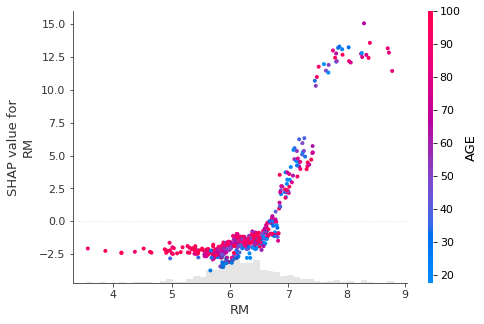

In [16]:
shap.plots.scatter(shap_values[:,"RM"], color=shap_values)

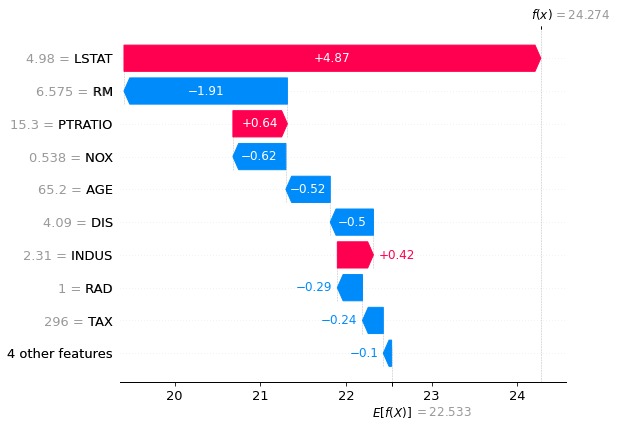

In [16]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [6]:
with open('/tmp/lele.pkl', 'wb') as opened:
    explainer.save(opened)

AttributeError: 'TreeEnsemble' object has no attribute 'save'

In [7]:
import inspect

In [10]:
inspect.getfullargspec(explainer.model.save)

AttributeError: 'TreeEnsemble' object has no attribute 'save'

In [8]:
inspect.getfullargspec?

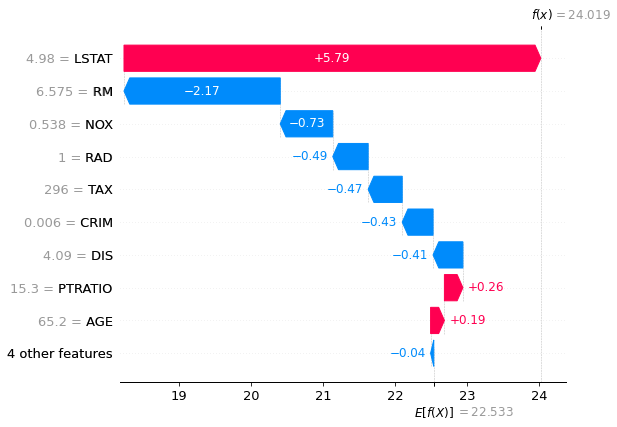

In [2]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])